# 🛍️ Flipkart Fashion Dataset Analysis

## 📌 Project Overview
This project explores an **e-commerce dataset from Flipkart**.  
It contains product details such as product ID, title, ratings, categories, price, and customer reviews.  

### 🎯 Goals
- Explore product trends and customer satisfaction.  
- Identify which categories perform better in terms of ratings.  
- Analyze how factors like price and reviews impact satisfaction.  
- Build a simple machine learning model to predict whether a product may need a discount during upcoming sales.  


In [4]:
import pandas as pd

# Load dataset (update path to where you saved it)
df = pd.read_csv("/Users/neerakumar/Downloads/test.csv")

# Basic overview
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Peek at first 5 rows
df.head()


Shape: (5244, 14)
Columns: ['id', 'title', 'Rating', 'maincateg', 'platform', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1']


,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


## 🔍 Step 1: Data Exploration
First, let’s check column types, missing values, and get a sense of the dataset.


In [7]:
# Data info
df.info()

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Quick statistics (numerical columns only)
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5244 non-null   int64  
 1   title       5244 non-null   object 
 2   Rating      5041 non-null   float64
 3   maincateg   5177 non-null   object 
 4   platform    5244 non-null   object 
 5   actprice1   5244 non-null   int64  
 6   norating1   5244 non-null   int64  
 7   noreviews1  5244 non-null   int64  
 8   star_5f     5176 non-null   float64
 9   star_4f     5244 non-null   int64  
 10  star_3f     5244 non-null   int64  
 11  star_2f     5244 non-null   int64  
 12  star_1f     5058 non-null   float64
 13  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 573.7+ KB

Missing values per column:
id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
s

,count,mean,std,min,25%,50%,75%,max
id,5244.0,10507.372616,5978.658892,0.0,5286.75,10561.5,15636.75,20964.0
Rating,5041.0,4.011089,0.301915,0.0,3.90,4.0,4.20,5.0
actprice1,5244.0,1378.657895,1280.630070,139.0,699.00,999.0,1299.00,15999.0
norating1,5244.0,2988.580092,12881.253715,1.0,66.00,307.0,1428.00,289973.0
noreviews1,5244.0,415.491037,1910.726669,0.0,9.00,44.0,214.25,45448.0
star_5f,5176.0,1557.443199,6583.766998,0.0,32.00,156.0,764.25,151193.0
star_4f,5244.0,639.785469,2991.065223,0.0,12.00,61.0,310.25,74037.0
star_3f,5244.0,356.356789,1632.732834,0.0,7.00,34.0,166.00,49924.0
star_2f,5244.0,154.139969,611.006799,0.0,3.00,16.0,75.00,12629.0
star_1f,5058.0,270.397786,1035.085288,0.0,6.00,29.0,131.00,23139.0


### Observations
Here we note:
- How many rows and columns the dataset has.  
- Which columns are categorical vs numerical.  
- Where there are missing values.  
- Whether ratings are evenly distributed or skewed.  


## 📊 Step 2: Exploratory Data Analysis (EDA)

In this step, we visualize:
- The distribution of ratings (to see customer satisfaction levels).  
- The most common product categories or product details.  
- Any brand or category that dominates in the dataset.  


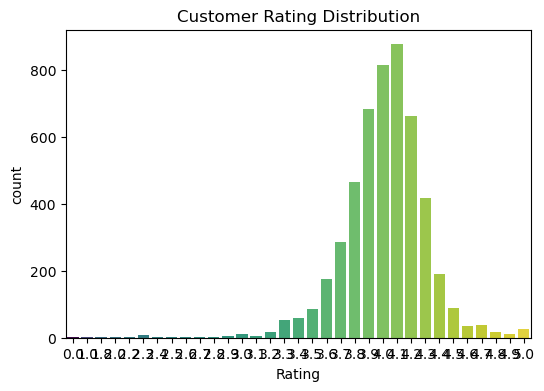

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Ratings
plt.figure(figsize=(6,4))
sns.countplot(x="Rating", data=df, hue="Rating", palette="viridis", legend=False)
plt.title("Customer Rating Distribution")
plt.show()


## 📊 Step 3: Product Insights

Next, let’s explore which product types are most common and how their ratings compare.  
This helps to understand what customers buy the most and what they actually like.  


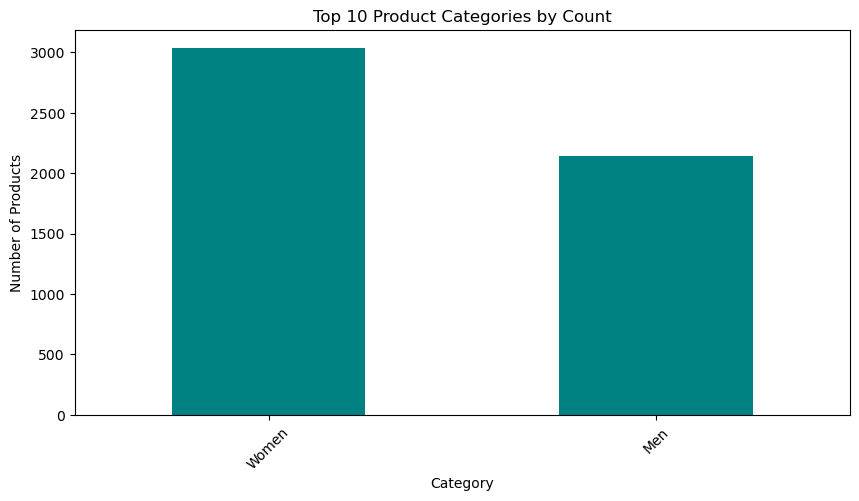

In [26]:
plt.figure(figsize=(10,5))
df['maincateg'].value_counts().head(10).plot(kind="bar", color="teal")
plt.title("Top 10 Product Categories by Count")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()


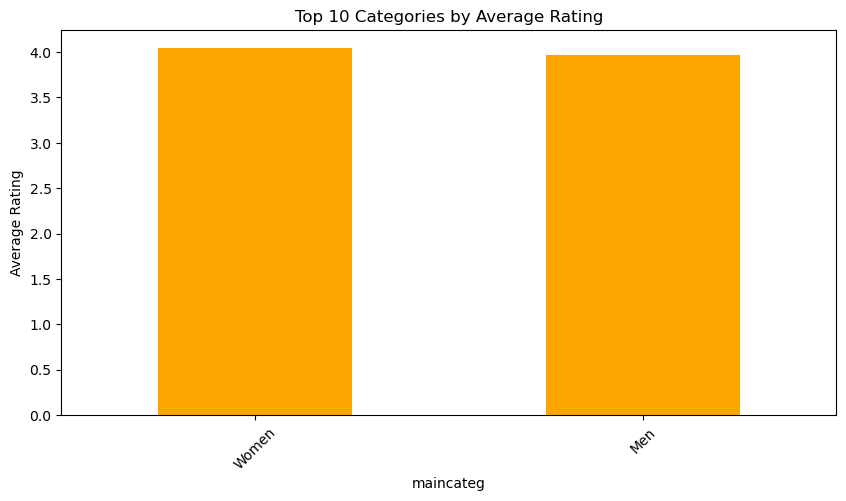

In [28]:
plt.figure(figsize=(10,5))
df.groupby("maincateg")['Rating'].mean().sort_values(ascending=False).head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Categories by Average Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


### Observations
- The first chart shows which categories have the most listings.  
- The second chart highlights which categories customers are happiest with (higher ratings).  
- From this, we can see a difference between **popular** categories and **well-rated** categories.  


## 💰 Step 4: Price vs Rating Analysis

Here we check if product prices (`actprice1`) have any relationship with customer ratings.  
This can tell us whether higher-priced items are generally rated better or worse.


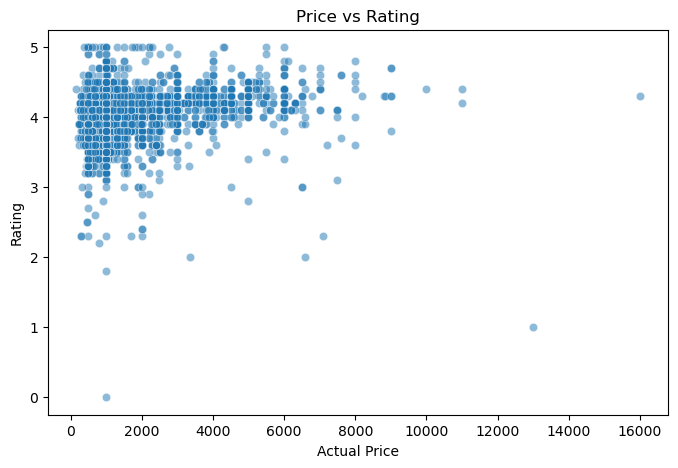

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="actprice1", y="Rating", data=df, alpha=0.5)
plt.title("Price vs Rating")
plt.xlabel("Actual Price")
plt.ylabel("Rating")
plt.show()


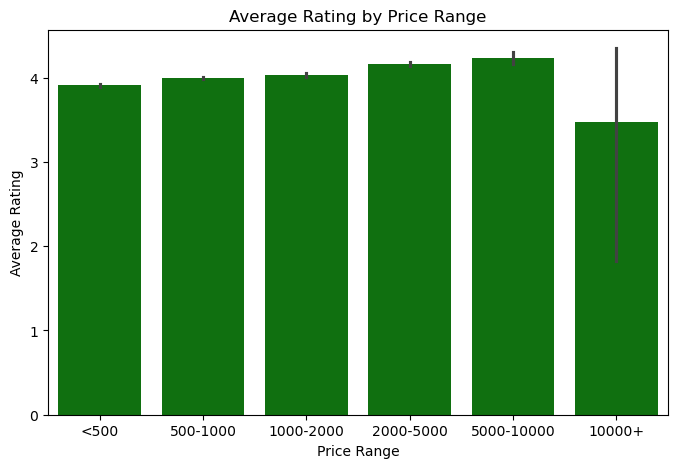

In [34]:
# Create bins for price ranges
df['PriceRange'] = pd.cut(df['actprice1'], bins=[0,500,1000,2000,5000,10000,20000], 
                          labels=['<500','500-1000','1000-2000','2000-5000','5000-10000','10000+'])

plt.figure(figsize=(8,5))
sns.barplot(x="PriceRange", y="Rating", data=df, estimator=lambda x: sum(x)/len(x), color="green")
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()


### Observations
- The scatter plot shows the spread of ratings across different price levels.  
- The bar chart gives a clearer picture of **average ratings per price range**.  
- This helps answer whether expensive products are truly seen as "better" by customers.  


## 🏬 Step 5: Platform Comparison (Flipkart vs Amazon)

Here we compare how products listed on Flipkart and Amazon perform in terms of:
- Number of products  
- Average customer rating  


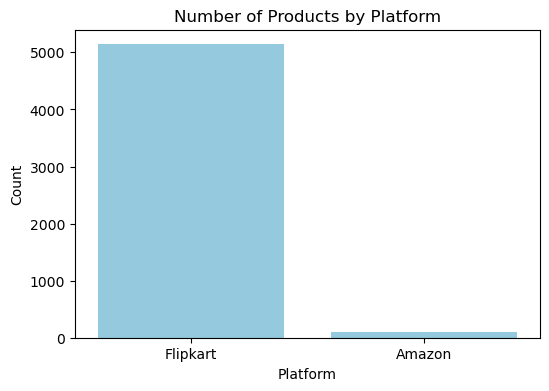

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x="platform", data=df, color="skyblue")
plt.title("Number of Products by Platform")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.show()


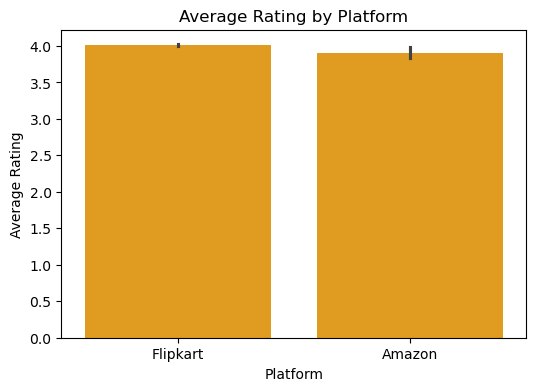

In [44]:
plt.figure(figsize=(6,4))
sns.barplot(x="platform", y="Rating", data=df, estimator=lambda x: sum(x)/len(x), color="orange")
plt.title("Average Rating by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.show()


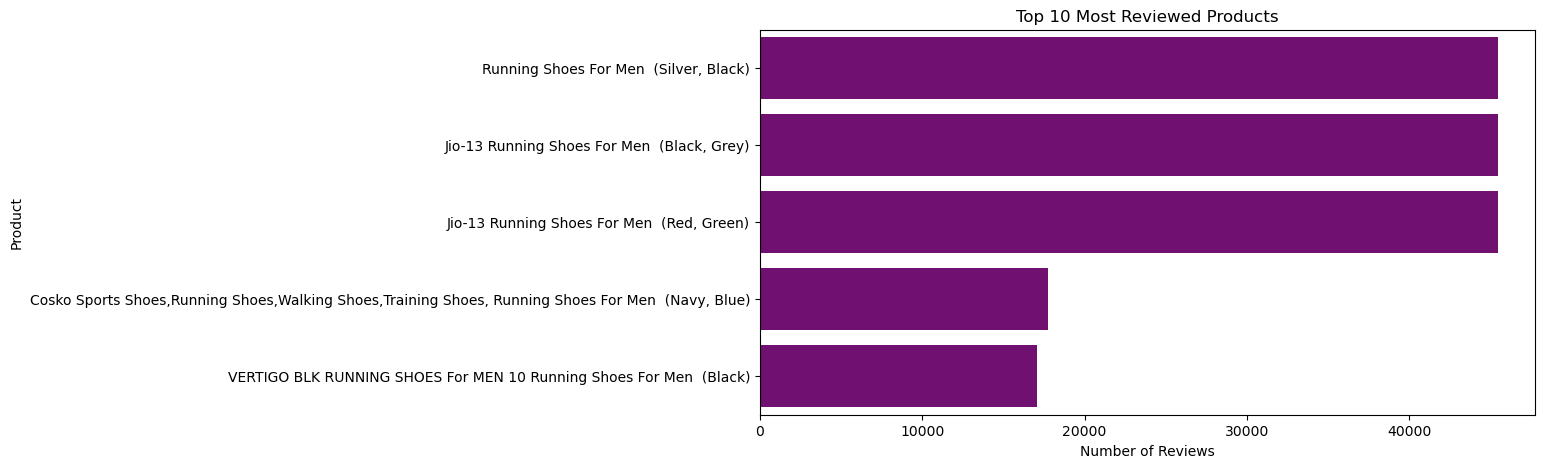

In [46]:
# Top reviewed products
top_reviews = df[['title','noreviews1']].sort_values(by='noreviews1', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y="title", x="noreviews1", data=top_reviews, color="purple")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product")
plt.show()

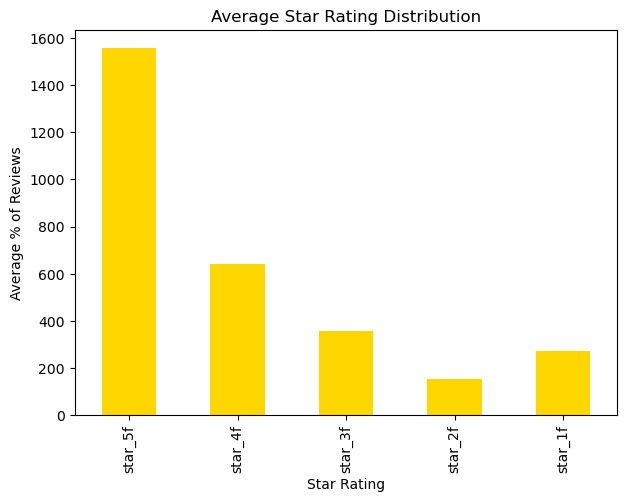

In [48]:
# Star rating breakdown
star_cols = ['star_5f','star_4f','star_3f','star_2f','star_1f']
avg_stars = df[star_cols].mean()

plt.figure(figsize=(7,5))
avg_stars.plot(kind="bar", color="gold")
plt.title("Average Star Rating Distribution")
plt.xlabel("Star Rating")
plt.ylabel("Average % of Reviews")
plt.show()

## 🤖 Step 6: Predicting Discount Need (ML Model)

Here we try to predict whether a product will likely need a discount in upcoming sales.  
We create a proxy variable (`Discount_Needed`) based on customer satisfaction:
- Products with low ratings and low reviews are more likely to be discounted.  


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [80]:
from sklearn.preprocessing import LabelEncoder

# Create target column
df['Discount_Needed'] = ((df['Rating'] < 3.5) & (df['noreviews1'] < 50)).astype(int)

# Encode categorical features
le_cat = LabelEncoder()
le_plat = LabelEncoder()

df['maincateg_enc'] = le_cat.fit_transform(df['maincateg'])
df['platform_enc'] = le_plat.fit_transform(df['platform'])

# Define Features (X) and Target (y)
X = df[['norating1','actprice1',
        'star_5f','star_4f','star_3f','star_2f','star_1f',
        'maincateg_enc','platform_enc']]


y = df['Discount_Needed']

print(" Features and target defined successfully")
print("X shape:", X.shape)
print("y value counts:\n", y.value_counts())


 Features and target defined successfully
X shape: (5244, 9)
y value counts:
 Discount_Needed
0    5088
1     156
Name: count, dtype: int64


## 🤖 Step 8: Training the Discount Prediction Model

We now train a Random Forest model to predict whether a product will likely need a discount.  
We use the features (ratings, reviews, price, category, platform, etc.) and our target (`Discount_Needed`).  


In [84]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Predictions
preds = clf.predict(X_test)

# Evaluation
print(" Model Trained")
print("Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))

 Model Trained
Accuracy: 0.9923736892278361

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1024
           1       0.90      0.76      0.83        25

    accuracy                           0.99      1049
   macro avg       0.95      0.88      0.91      1049
weighted avg       0.99      0.99      0.99      1049



### Model Evaluation

The Random Forest model achieved ~99% accuracy overall.  

- For products that **do not need discounts** (class 0), the model performs almost perfectly.  
- For products that **do need discounts** (class 1), the model has 90% precision and 76% recall.  

This means:
- The model is very good at correctly identifying non-discount items.  
- It correctly flags most discount-needing products, but misses a few.  

In practice, this model could help e-commerce teams **prioritize which items to put on sale** during campaigns.  
